In [260]:
import pandas as pd
import numpy as np
import statistics as stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from scipy.stats import zscore


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
import pydotplus as pydot
from sklearn import tree
from os import system

In [261]:
df=pd.read_csv('Mobile_data.csv')

In [262]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [263]:
df.price_range=df.price_range.replace({0:'low cost',1:'medium cost',2:'high cost',3:'very high cost'})

In [264]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range       object
dtype: object

In [265]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [266]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [267]:
df.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


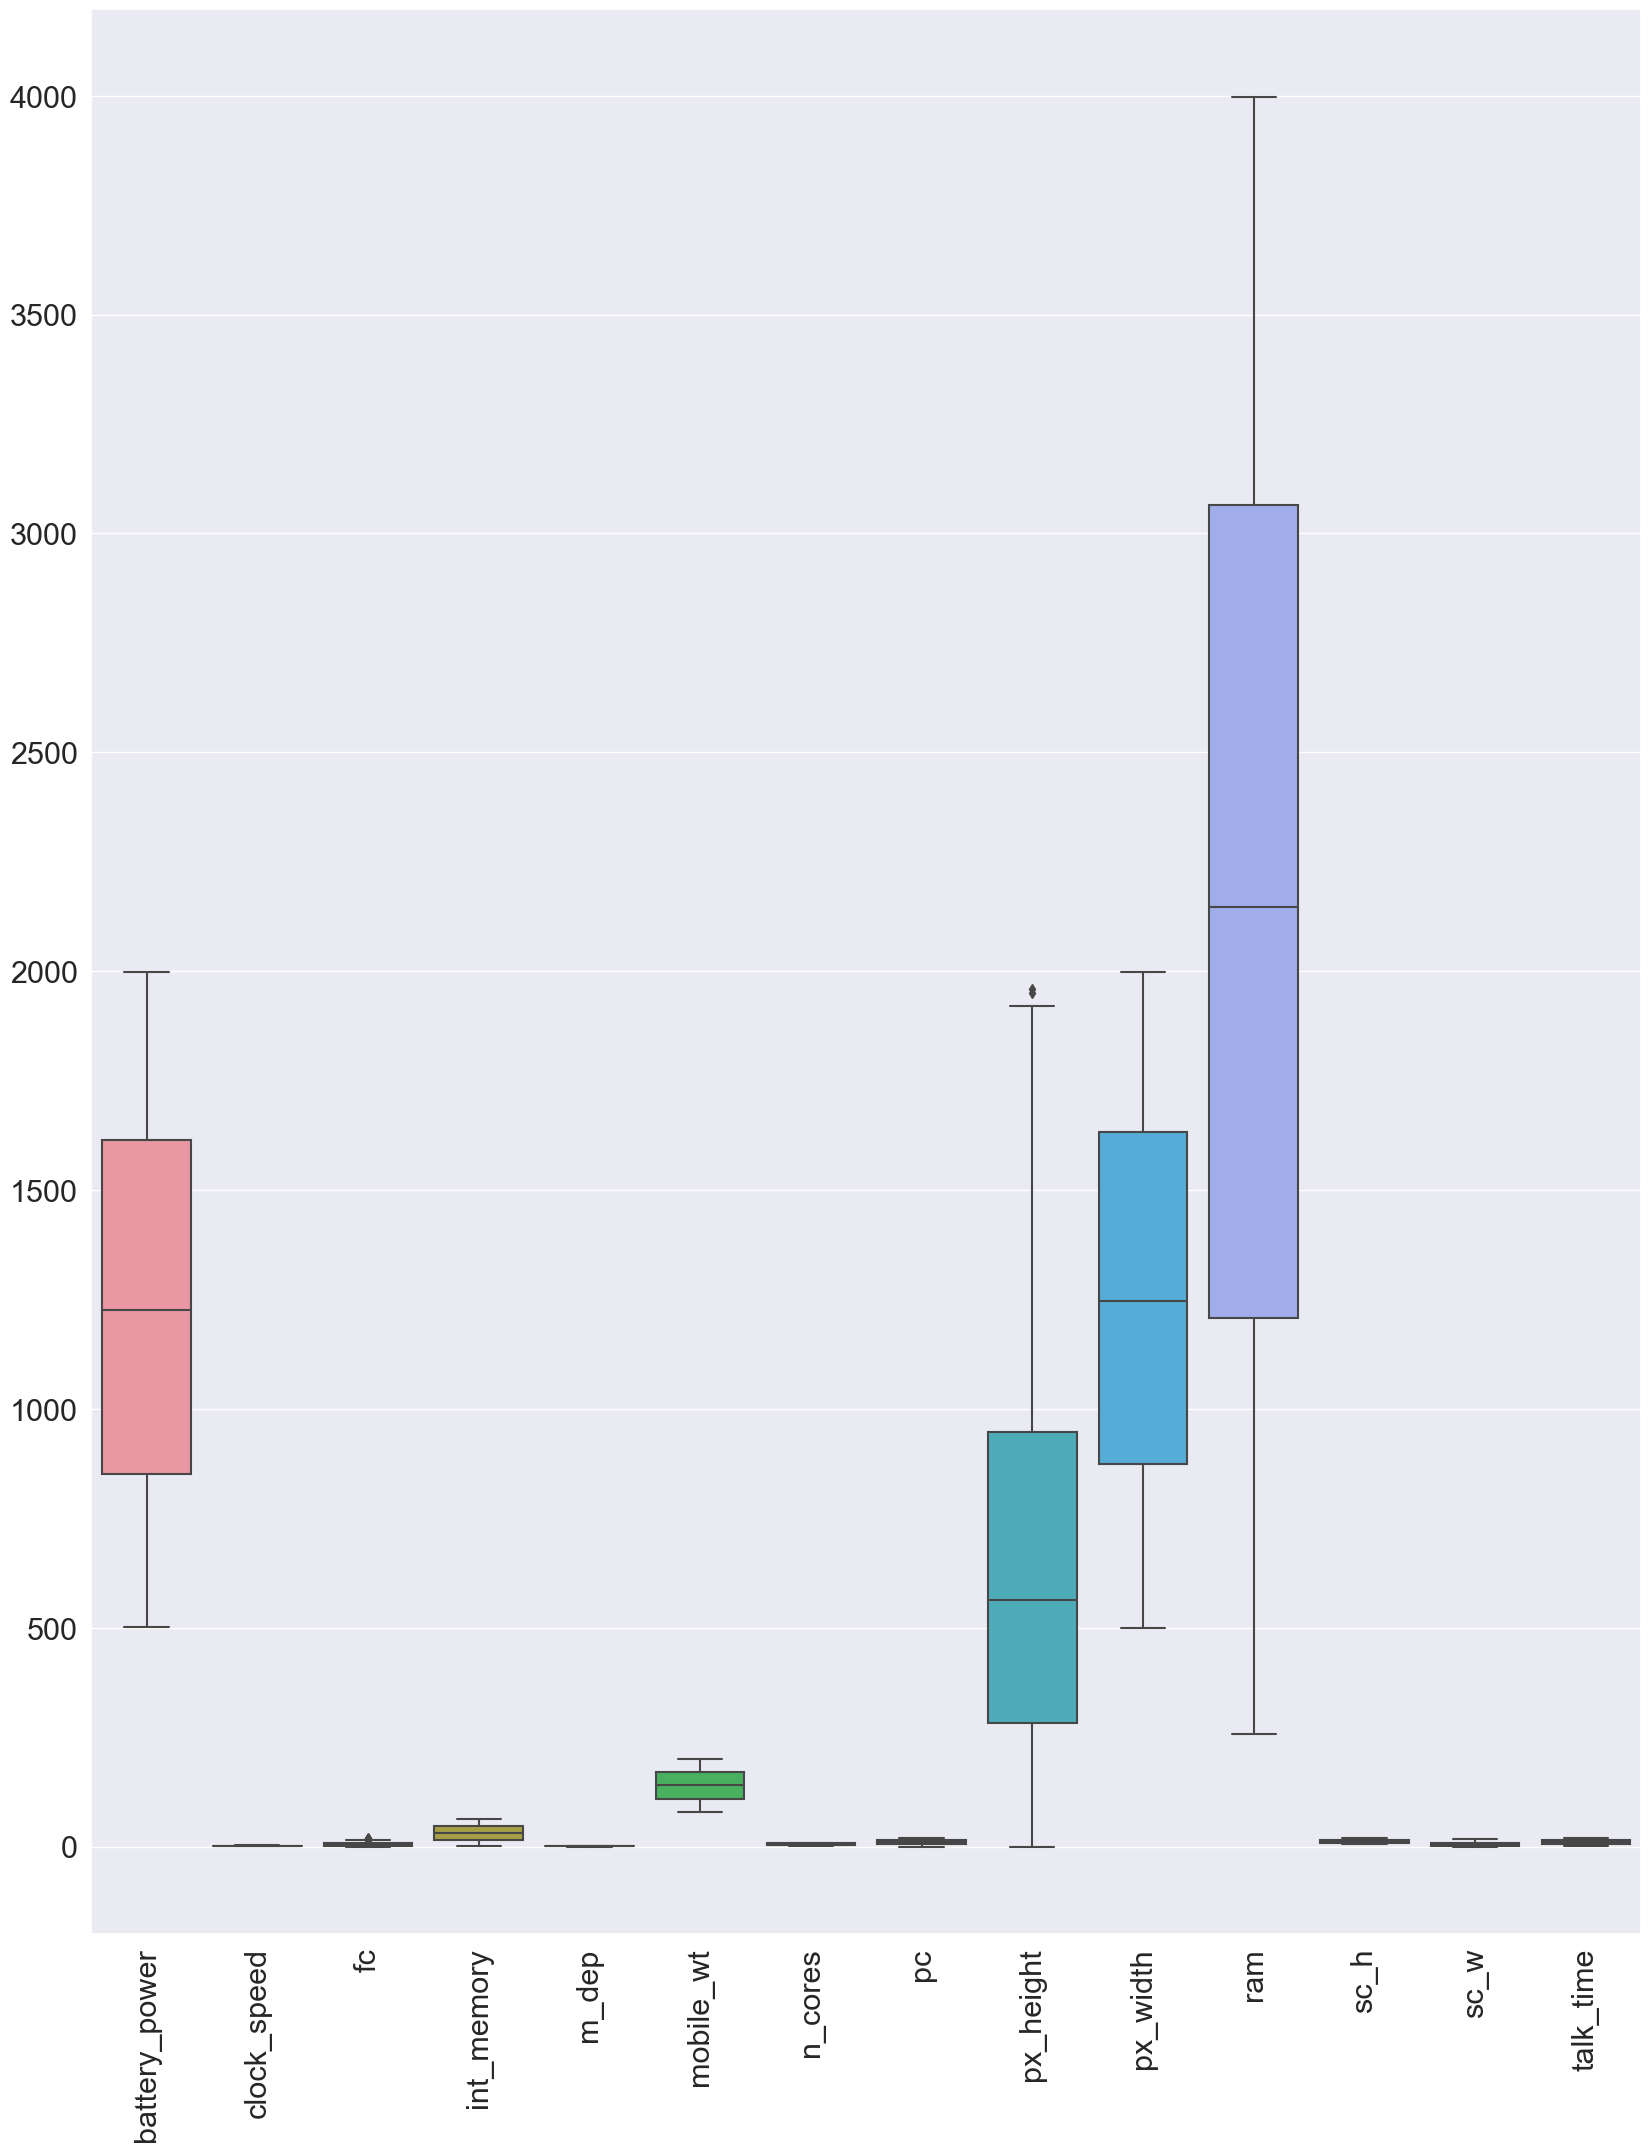

In [268]:
fig, ax = plt.subplots(figsize=(20,25))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

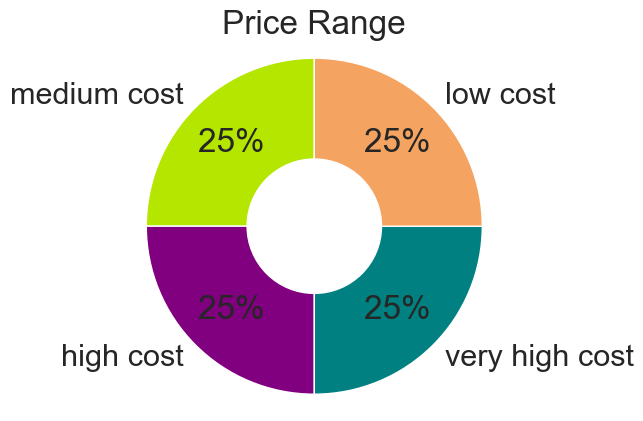

In [321]:
freq = df['price_range'].value_counts()
counts = freq.to_list()
keys = freq.keys().to_list()
colors = ["#b4e600","#800080","#008080","#F4A460"]
plt.pie(x=counts,labels = keys,colors=colors,autopct='%1.0f%%',startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Price Range")
plt.show()

In [269]:
x=df.drop(['price_range'],axis=1)
y=df.price_range

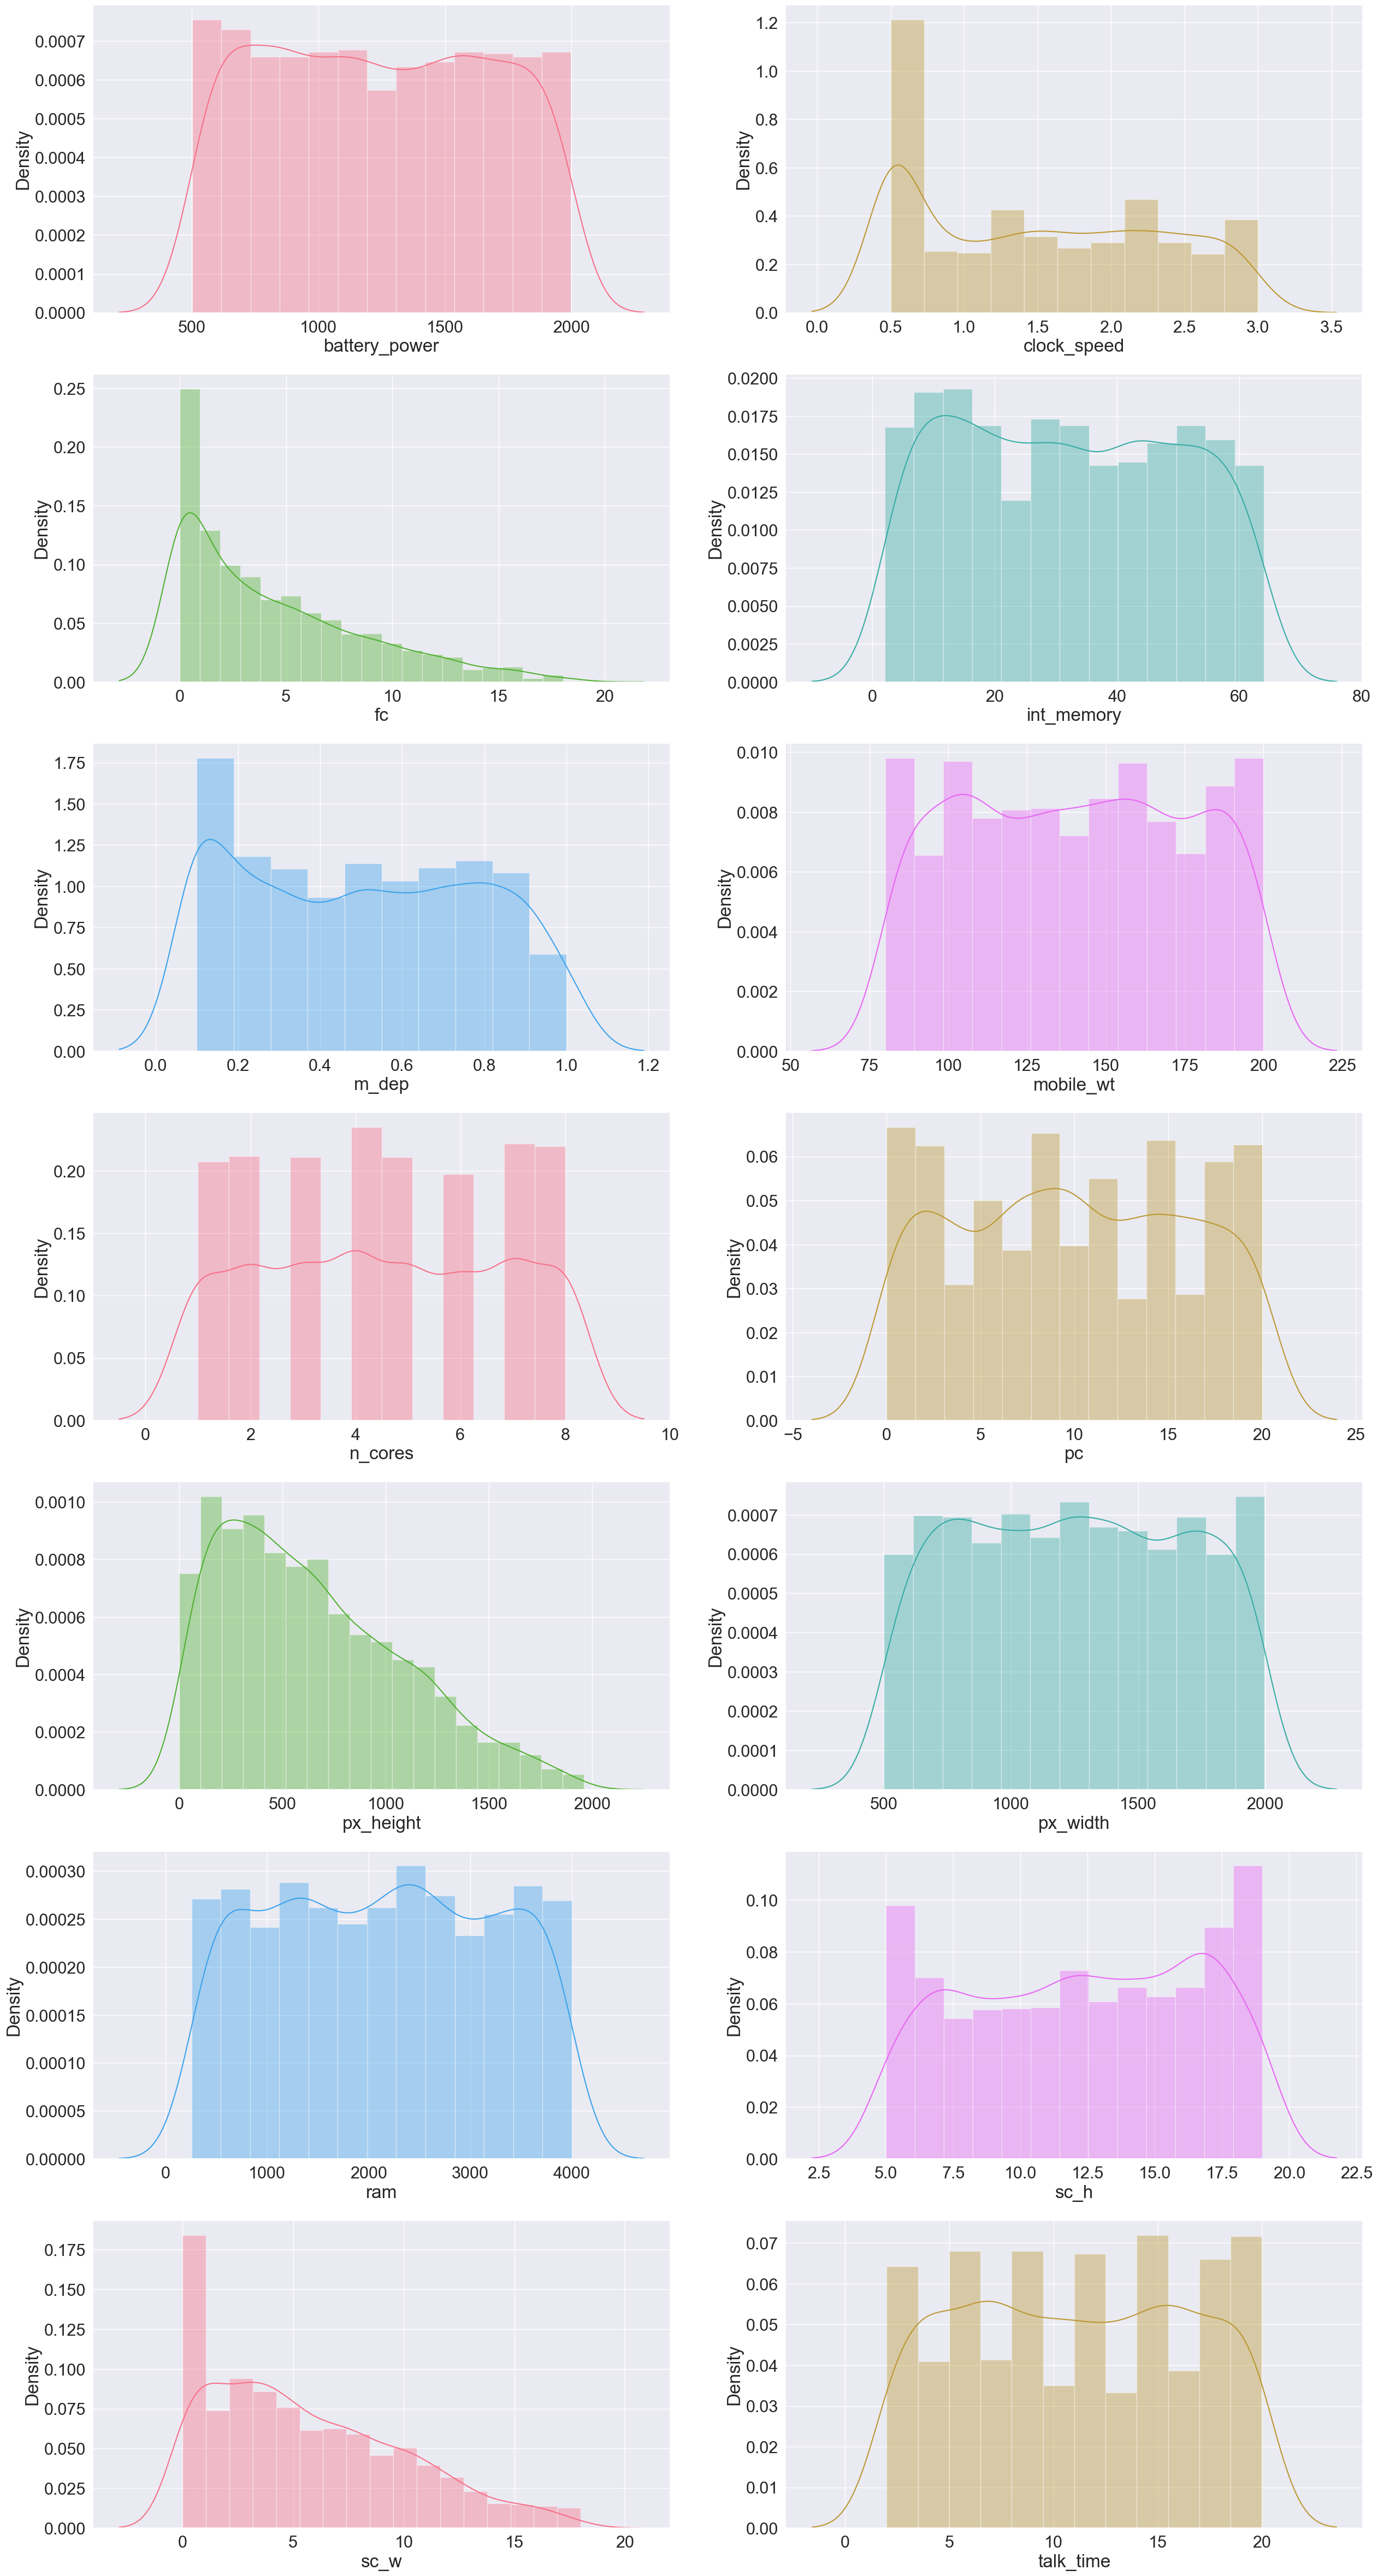

In [270]:
n_rows = 7
n_cols = 2
colors = sns.color_palette('husl')
sns.set(font_scale=2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30,60))
for i, column in enumerate(x.columns):
    sns.distplot(df[column], ax=axes[i // n_cols, i % n_cols], color=colors[i % len(colors)])
plt.show()

### KNeighbours Classifier

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
modelk=KNeighborsClassifier(n_neighbors=5,p=2)
modelk.fit(x_train,y_train)

KNeighborsClassifier()

In [272]:
modelk.score(x_train,y_train)

0.9442857142857143

In [273]:
modelk.score(x_test,y_test)

0.925

In [274]:

neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [275]:
MSE=[1-x for x in cv_scores]
MSE

[0.09099999999999997,
 0.07499999999999996,
 0.0764999999999999,
 0.0734999999999999,
 0.07199999999999984,
 0.06649999999999989,
 0.06900000000000017,
 0.0684999999999999,
 0.0684999999999999,
 0.06799999999999995,
 0.06599999999999984,
 0.0684999999999999,
 0.07050000000000023,
 0.06899999999999995,
 0.06899999999999995,
 0.0695,
 0.07049999999999979,
 0.07050000000000001,
 0.07300000000000006,
 0.07099999999999995,
 0.07400000000000007,
 0.07250000000000001,
 0.07150000000000001,
 0.07400000000000007,
 0.0734999999999999,
 0.0734999999999999,
 0.0754999999999999,
 0.07699999999999996,
 0.07499999999999996,
 0.07600000000000018,
 0.07650000000000001,
 0.07650000000000001,
 0.07499999999999996,
 0.07300000000000006,
 0.07750000000000001,
 0.07699999999999996,
 0.07899999999999996,
 0.07799999999999996,
 0.07950000000000013,
 0.08200000000000007,
 0.08150000000000013,
 0.08349999999999991,
 0.08200000000000007,
 0.08550000000000002,
 0.08449999999999991,
 0.0824999999999999,
 0.0820000

In [276]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

21

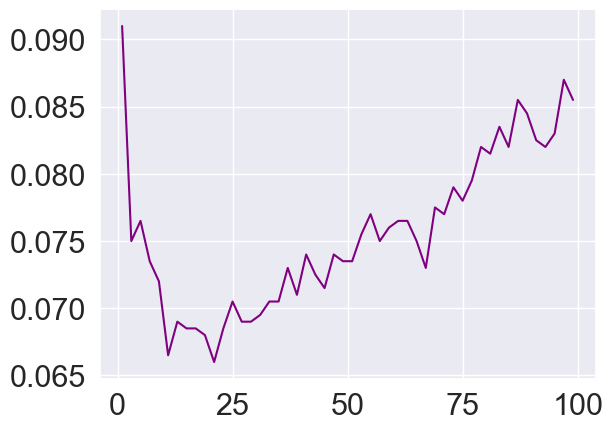

In [277]:
plt.plot(neighbors,MSE,color='purple')

In [278]:
modelk_1=KNeighborsClassifier(n_neighbors=21,p=2)
modelk_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [279]:
modelk_1.score(x_train,y_train)

0.9378571428571428

In [280]:
modelk_1.score(x_test,y_test)

0.94

#### changing other hyperparameters

In [281]:
modelk_2=KNeighborsClassifier(n_neighbors=15,p=2,weights='distance',n_jobs=None,leaf_size=40)
modelk_2.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=40, n_neighbors=15, weights='distance')

In [282]:
modelk_2.score(x_train,y_train)

1.0

In [283]:
modelk_2.score(x_test,y_test)

0.95

### Kneighbours Classifier for scaled data

In [284]:
xscale=x.apply(zscore)
xscale.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.545430e-16,5.861978e-17,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


In [285]:
x1_train,x1_test,y1_train,y1_test=train_test_split(xscale,y,test_size=0.30,random_state=0)

In [286]:
modelk1=KNeighborsClassifier()
modelk1.fit(x1_train,y1_train)

KNeighborsClassifier()

In [287]:
modelk1.score(x1_train,y1_train)

0.7564285714285715

In [288]:
modelk1.score(x1_test,y1_test)

0.5983333333333334

In [289]:

neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xscale,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [290]:
MSE=[1-x for x in cv_scores]
MSE

[0.4604999999999999,
 0.42699999999999994,
 0.4085,
 0.37949999999999995,
 0.3670000000000001,
 0.3589999999999999,
 0.34299999999999997,
 0.3345,
 0.3335,
 0.3314999999999999,
 0.3364999999999999,
 0.3225,
 0.32099999999999995,
 0.3164999999999999,
 0.3225,
 0.3205,
 0.31900000000000006,
 0.31699999999999995,
 0.3065,
 0.3125000000000001,
 0.3065000000000001,
 0.3045,
 0.3055000000000001,
 0.30700000000000005,
 0.3015000000000001,
 0.3075,
 0.30499999999999994,
 0.29800000000000004,
 0.30500000000000005,
 0.2945,
 0.3004999999999999,
 0.2945,
 0.30199999999999994,
 0.30000000000000004,
 0.2975000000000001,
 0.29500000000000015,
 0.2965000000000001,
 0.2975000000000001,
 0.29600000000000004,
 0.2875,
 0.28800000000000003,
 0.28600000000000003,
 0.2879999999999999,
 0.28400000000000003,
 0.2915,
 0.2885,
 0.29100000000000004,
 0.29399999999999993,
 0.2929999999999999,
 0.29500000000000004]

In [291]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

87

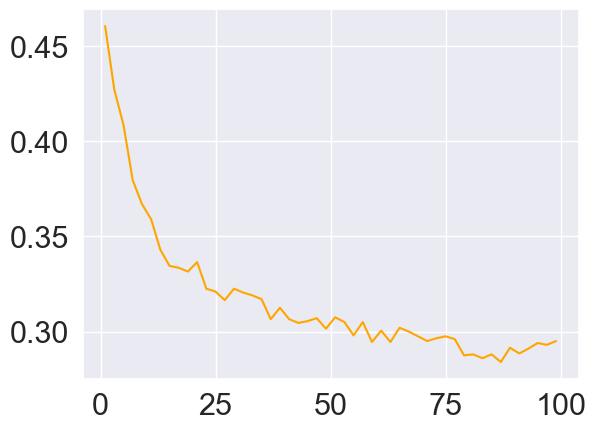

In [292]:
plt.plot(neighbors,MSE,color='orange')

In [293]:
modelk2=KNeighborsClassifier(n_neighbors=79,p=2)
modelk2.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=79)

In [294]:
modelk2.score(x1_train,y1_train)

0.7121428571428572

In [295]:
modelk2.score(x1_test,y1_test)

0.7166666666666667

In [296]:
modelk3=KNeighborsClassifier(n_neighbors=300,p=1,weights='uniform',n_jobs=None,leaf_size=50)
modelk3.fit(x1_train,y1_train)

KNeighborsClassifier(leaf_size=50, n_neighbors=300, p=1)

In [297]:
modelk3.score(x1_train,y1_train)

0.8021428571428572

In [298]:
modelk3.score(x1_test,y1_test)

0.8033333333333333

In [299]:
y_pred = modelk.predict(x_test)
modelk.predict_proba(x_test)[:,0]

array([0. , 0. , 1. , 0.8, 0.6, 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.8,
       0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0.6, 0. , 0. , 0. , 0. ,
       0. , 0.4, 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2,
       0. , 0. , 0. , 0.6, 0.8, 0.8, 0. , 0.2, 0.2, 0. , 0.2, 1. , 0. ,
       0.8, 0. , 0.8, 0.6, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0.4,
       0.2, 1. , 0. , 0. , 0.2, 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. ,
       0.6, 0.4, 0. , 0. , 0.4, 0.6, 0. , 0. , 0. , 0.4, 0. , 0.4, 0.4,
       0. , 1. , 1. , 0. , 1. , 0. , 0.2, 0. , 0. , 0. , 0.4, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0.4, 0. , 0. , 0. , 1. ,
       0. , 0. , 0.4, 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 0.2,
       0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0.2, 0. , 0.2, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 0.2, 0. , 1. , 0. , 0. , 0.6, 0. ,
       0. , 0. , 0.8, 1. , 0. , 0. , 0. , 0.8, 1. , 0. , 0. , 0.

### Confusion matrix

In [300]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[131,   0,   7,  13],
       [  0, 148,   3,   0],
       [  4,  10, 121,   0],
       [  8,   0,   0, 155]], dtype=int64)

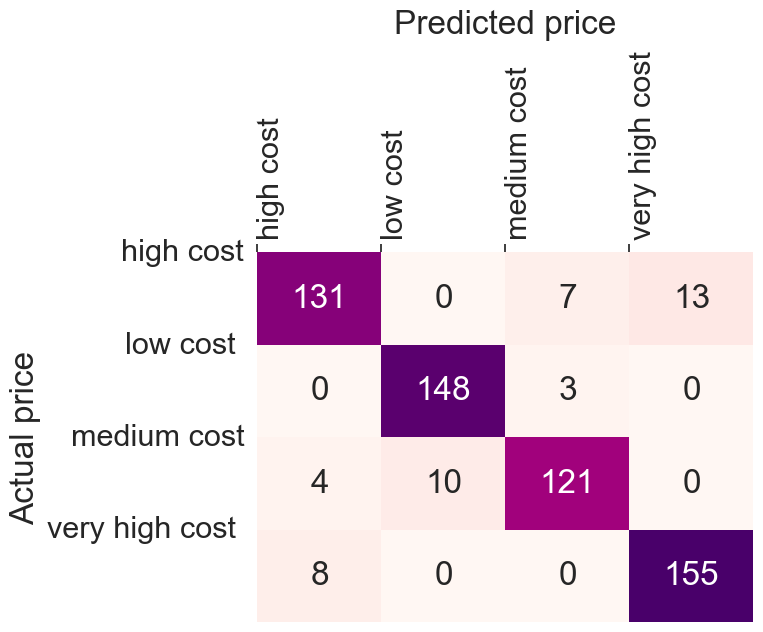

In [301]:
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',cbar=False)
ax.xaxis.tick_top()
plt.title('Predicted price')
plt.ylabel('Actual price')
plt.xticks([0,1,2,3],['high cost','low cost ','medium cost','very high cost '],rotation=90,ha='left')
plt.yticks([0,1,2,3],['high cost','low cost ','medium cost','very high cost '],rotation=0)


plt.show()

In [302]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

     high cost       0.92      0.87      0.89       151
      low cost       0.94      0.98      0.96       151
   medium cost       0.92      0.90      0.91       135
very high cost       0.92      0.95      0.94       163

      accuracy                           0.93       600
     macro avg       0.92      0.92      0.92       600
  weighted avg       0.92      0.93      0.92       600



In [303]:
report = classification_report(y_test, y_pred, output_dict=True)
adf = pd.DataFrame(report).transpose()
adf

,precision,recall,f1-score,support
high cost,0.916084,0.867550,0.891156,151.000
low cost,0.936709,0.980132,0.957929,151.000
medium cost,0.923664,0.896296,0.909774,135.000
very high cost,0.922619,0.950920,0.936556,163.000
accuracy,0.925000,0.925000,0.925000,0.925
macro avg,0.924769,0.923725,0.923854,600.000
weighted avg,0.924755,0.925000,0.924483,600.000


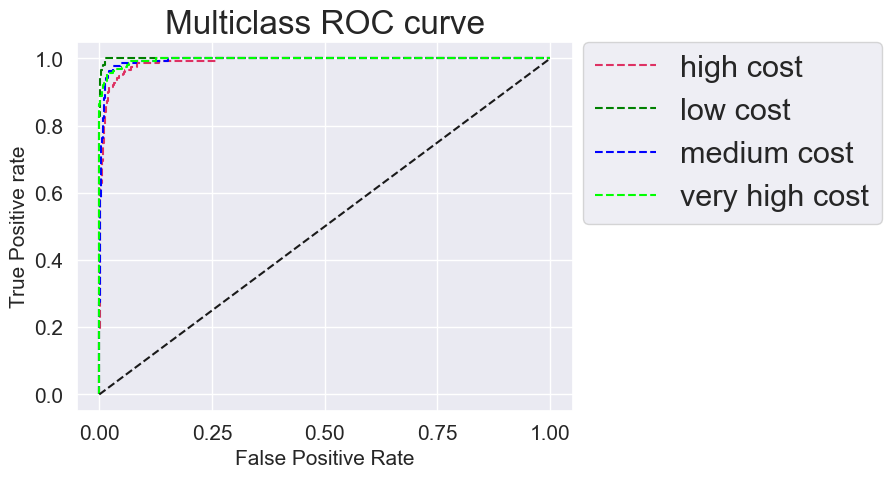

In [304]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# fit model
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=15,p=2,weights='distance',n_jobs=None,leaf_size=40))
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4
pos=['high cost','low cost','medium cost','very high cost']

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=pos[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='#DE3163', label='high cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='low cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='medium cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='#00FF00', label='very high cost')
plt.plot([0,1], [0,1], 'k--' )


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate',fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.yticks(fontsize=15)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('Multiclass ROC',dpi=300)
